Linear Least Squares
========

# Theory
**Least Squares (LS)** is a curve fitting method that is primarily estimate the parameters of a chosen model function to best approximate the general trend of a given data set.

## Definition
**Least Squares (LS)** strategy to estimate the model function parameters, that best fit the data; is to minimize the sum of the squares of the residuals (a residual being the error between the observed value provided by data and the fitted value provided by a model function).

Formally, the minimization problem that **LS** presented is
$$
\begin{equation}
\text{LS} := \min \sum_{i=1}^n r_i^2 \qquad \text{,where} \quad r_i = \hat{f}(\mathbf{x}_i\,, \beta) - y_i
\end{equation}$$

where for a data set of $n$ points $(\mathbf{x}, y)$, a model function $(\hat{f}(\mathbf{x}, \beta))$, and a residual (r). We want to find parameters $\beta$ that minimize the sum of the squared residuals above.

> To elaborate  more, **LS** method view the parameters $\beta$ as the variables and $\mathbf{x}$ data points as given constant weights in the model function, hence the minimization stepup would solve for $\beta$. For this to work the number of data points $n$ has to be greater than or equal to the number of parameters of the model function $m$.

**Linear Least Squares (LLS)** is a type of **LS** method that deals with the category of model functions that their parameters $\beta$ are independent and linearly combined. The general form such model functions is
$$
\begin{equation}
\hat{f}(\mathbf{x}, \beta) = \beta_1 \phi_1(\mathbf{x}) + \beta_2 \phi_2(\mathbf{x}) + \dots + \beta_m \phi_m(\mathbf{x})
\end{equation}$$

A valid example of such model function
$$
\begin{equation*}
\hat{f}(\mathbf{x},\beta) = \beta_1 + \beta_2 \mathbf{x} + \beta_3 \mathbf{x}^2 + \beta_4 \sin(4\mathbf{x}) + \beta_5 \ln(2\mathbf{x})
\end{equation*}$$

To solve for optimal $\beta$ in **LLS**, there is two approach to achieve this minimization task
- Exploiting linear algebra concepts
- Exploiting multivariate calculus concepts 

### Linear Algebra Approach  
Lets write explicitly the linear system, since $\beta$ are linearly combined; of residuals equations
$$
\begin{align*}
\overbrace{\beta_1 \phi_1(\mathbf{x}_1) + \beta_2 \phi_2(\mathbf{x}_1) + \dots + \beta_m \phi_m(\mathbf{x}_1) \vphantom{\Large f^{(k)}}}^{\normalsize \hat{f}(\mathbf{x}, \beta)} - \overbrace{y_1 \vphantom{\Large f^{(k)}}}^{\normalsize y_i} \; &= \overbrace{r_1 \vphantom{\Large f^{(k)}}}^{\normalsize r_i} \\[5pt]
\beta_1 \phi_1(\mathbf{x}_2) + \beta_2 \phi_2(\mathbf{x}_2) + \dots + \beta_m \phi_m(\mathbf{x}_2)\, -\; y_2 \;\; &= r_2 \\[5pt]
\beta_1 \phi_1(\mathbf{x}_n) + \beta_2 \phi_2(\mathbf{x}_n) + \dots + \beta_m \phi_m(\mathbf{x}_n) - \;\; y_n \; &= \;r_n
\end{align*}$$

This system of linear equations can be expressed in matrix form
$$
\begin{equation*}
\textbf{A} \vec{\beta} - \vec{y} = \vec{r}
\end{equation*}$$

where $\textbf{A} = \phi_i(\mathbf{x}_j) \in \mathbb{R}^{n \times m}$ is the constant weights matrix (model matrix), $\vec{\beta} \in \mathbb{R}^{m}$ model parameters vector, $\vec{y} \in \mathbb{R}^{n}$ observed values vector, and $\vec{r} \in \mathbb{R}^{n}$ is residuals vector. The minimization process in this approach is based on the following idea,
> If the minimization process proved that $$|r|_2 = \sqrt{r_1^2 + r_2^2 + \dots + r_n^2}$$ is minimal, then this imply that $$\sum_{i=1}^n r_i^2 = r_1^2 + r_2^2 + \dots + r_n^2$$ is also minimal, hence the **least-squares problem is solved**.


#### Graphical Representation
To understand the minimization process in this approach, lets investigate the visual representation of simple version of this linear system. Lets consider a problem in $2\text{D}$ of fitting a straight line to 3 data points $\lbrace (x_1, y_1), (x_2, y_2), (x_3, y_3) \rbrace$. The expected model function is in the form 
$$
\hat{f}(x, \beta) = \beta_1 x + \beta_2
$$

And the linear system of residuals equations reads 
$$
\begin{align*}
\beta_1 x_1 + \beta_2 - y_1 &= r_1 \\[5pt]
\beta_1 x_2 + \beta_2 - y_2 &= r_2 \\[5pt]
\beta_1 x_3 + \beta_2 - y_3 &= r_3 \\[5pt]
\end{align*}$$

In matrix form
$$
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2
\end{bmatrix}
- 
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
=
\begin{bmatrix}
r_1 \\
r_2 \\
r_3
\end{bmatrix}
$$

The linear combination of the two column vectors of matrix $\textbf{A}$ "i.e. $\beta_1 \vec{a}_1 + \beta_2 \vec{a}_2$" span a plane in $\mathbb{R}^3$, since the column vectors live in $\mathbb{R}^3$. The linear combination is factored by the parameters, hence each point in this plane correspond to the prediction of a model function with some parameters $(\beta_1, \beta_2)$. This can be expressed graphically
<div style="text-align:center"><img src="./Resources/Least Squares - column vector plane.png" width="600"/></div>

Now if we consider the observation vector $(y)$ and residuals vector $(r)$ in our system. One can estimate the parameters of the model function $(\beta_1, \beta_2)$ by finding the linear combination of the column vectors $\beta_1 \vec{a}_1 + \beta_2 \vec{a}_2$ that minimize the euclidean length of $r$.
> In general terms,there is two cases
> - $(y)$ lie **in the plane** constructed by $a_1$ and $a_2$, then one can find linear combination, with parameter $(\beta_1, \beta_2)$ that predict $(y)$ exactly "i.e. the model function pass through all points", which in this case the length of vector $(r)$ is zero. This case only happen under the condition, $$ \text{number of parameter} = \text{number of points}$$ In this case one can solve the system of equations directly, since matrix $\textbf{A}$ will be square hence invertible.
> - $(y)$ is **outside the plane** constructed by $a_1$ and $a_2$, then the Euclidean length of $r$ is minimized is when $r$ is perpendicular to the plane. One can find the linear combination, with parameter $(\beta_1, \beta_2)$ that make this statement true. (*See the two figures below*) $$r \perp \hat{y}$$

<div style="text-align:center">
    <img src="./Resources/Least Squares - residual equation.png" width="400" />
    <img src="./Resources/Least Squares - normal equation.png" width="400" />
</div>

For the second case, starting from the condition $r \perp \hat{y}$ one will construct a new set of equations called system of normal equations that will allow us to solve for $\vec{\beta}$. The condition $r \perp \hat{y}$ imply that $r$ is also perpendicular to the plane and any vector inside it. Since the dot product between and two perpendicular vectors is zero one can write the following
$$
\begin{align*}
\vec{a}_1 \cdot \vec{r} &= 0\\
\vec{a}_2 \cdot \vec{r} &= 0
\end{align*}$$

Substituting $\vec{r}$ with $\vec{a_1} \beta_1 + \vec{a_2} \beta_2 - \vec{y}$, the system of equation reads
$$
\begin{align*}
(\vec{a}_1 \cdot \vec{a}_1) \, \beta_1 + (\vec{a}_1 \cdot \vec{a}_2) \, \beta_2 - (\vec{a}_1 \cdot \vec{y}) &= 0\\
(\vec{a}_2 \cdot \vec{a}_1) \, \beta_1 + (\vec{a}_2 \cdot \vec{a}_2) \, \beta_2 - (\vec{a}_2 \cdot \vec{y}) &= 0
\end{align*}$$

This system of equations is called the normal equations. Notice that the system matrix of the normal equations is symmetric, due to the commutative property of the dot product "i.e. $(\vec{a}_1 \cdot \vec{a_2}) = (\vec{a}_2 \cdot \vec{a_1})$". Expressing the system in matrix form 
$$
\begin{equation*}
\textbf{A}_* \vec{\beta} = \vec{b}
\end{equation*}$$

Where 
$$
\begin{align*}
\textbf{A}_* &= \textbf{A}^{\texttt{T}} \; \textbf{A}
=
\begin{bmatrix}
(\vec{a}_1 \cdot \vec{a}_1) & \cdots & (\vec{a}_1 \cdot \vec{a}_m) \\
\vdots                      & \ddots & \vdots                      \\
(\vec{a}_m \cdot \vec{a}_1) & \cdots & (\vec{a}_m \cdot \vec{a}_m)
\end{bmatrix},

\qquad&

\vec{b} &= \textbf{A}^{\texttt{T}} \; \vec{y}
=
\begin{bmatrix}
(\vec{a}_1 \cdot \vec{y}) \\
\vdots \\
(\vec{a}_m \cdot \vec{y})
\end{bmatrix}
\end{align*}$$

This system of equations can be solved directly, since matrix $\textbf{A}_*$ is square hence invertible.


### Multivariate Calculus Approach
Starting from the sum of squares residuals definition
$$
\begin{equation}
\text{Error} = \sum_{i=1}^n (\hat{f}(\mathbf{x}_i\,, \beta) - y_i)^2 = \sum_{i=1}^n (\; \overbrace{\beta_1 \phi_1(\mathbf{x}_i) + \beta_2 \phi_2(\mathbf{x}_i) + \dots + \beta_m \phi_m(\mathbf{x}_i)}^{\normalsize\hat{f}(\mathbf{x}_i\,, \beta) = \sum_{j=1}^m\beta_j \phi_j(\mathbf{x}_i)} - y_i\;)^2
\end{equation}$$

We can see when we expanded $\hat{f}(\mathbf{x}_i\,, \beta)$, the sum of squares residuals equation represent a paraboloid in $m-\text{dimension}$, expressed in terms of independent variables $\beta_1, \beta_2, \dots, \beta_m$. From this realization we can exploit concepts from calculus that handel the minimization problem of convex functions "such as paraboloid". We recall that global minima of a convex function is located at a point where all partial derivatives of the function are zero.
$$
\begin{equation*}
\nabla\; \text{Error} = \mathbf{0}
\end{equation*}$$

Lets expand this system of equations
$$
\begin{align*}
\frac{\partial}{\partial \beta_1} \; \text{Error} \;   \Rightarrow \qquad\qquad &\sum_{i=1}^n  \;2(\; \textstyle{\sum_{j=1}^m} \beta_j \phi_j(\mathbf{x}_i) - y_i\;) \phi_1(\mathbf{x}_i) = 0 \\[15pt]
\frac{\partial}{\partial \beta_2} \; \text{Error} \;   \Rightarrow \qquad\qquad &\sum_{i=1}^n  \;2(\; \textstyle{\sum_{j=1}^m} \beta_j \phi_j(\mathbf{x}_i) - y_i\;) \phi_2(\mathbf{x}_i) = 0 \\
                                                    &\qquad\qquad\qquad\qquad\vdots                                                                                                           \\
\frac{\partial}{\partial \beta_m} \; \text{Error} \;   \Rightarrow \qquad\qquad &\sum_{i=1}^n  \;2(\; \textstyle{\sum_{j=1}^m} \beta_j \phi_j(\mathbf{x}_i) - y_i\;) \phi_m(\mathbf{x}_i) = 0  
\end{align*}$$

We need to find the set of parameters $\beta_1, \beta_2, \dots, \beta_m$ that make this system of equations evaluate to zero. To do so, we rearrange the terms for $\vec{\beta}$, the system of equations reads
$$
\begin{align*}
\sum_{i=1}^n  (\; \textstyle{\sum_{j=1}^m} \beta_j \phi_j(\mathbf{x}_i) \phi_1(\mathbf{x}_i) \;)  &= \sum_{i=1}^n y_i \phi_1(\mathbf{x}_i) \\[15pt]
\sum_{i=1}^n  (\; \textstyle{\sum_{j=1}^m} \beta_j \phi_j(\mathbf{x}_i) \phi_2(\mathbf{x}_i) \;)  &= \sum_{i=1}^n y_i \phi_2(\mathbf{x}_i) \\
                                                     \vdots\qquad\qquad\qquad                                                               \\
\sum_{i=1}^n  (\; \textstyle{\sum_{j=1}^m} \beta_j \phi_j(\mathbf{x}_i) \phi_m(\mathbf{x}_i) \;)  &= \sum_{i=1}^n y_i \phi_m(\mathbf{x}_i) 
\end{align*}$$

The above summation can be expressed in matrix form
$$
\begin{bmatrix}
(\phi_1(\vec{\mathbf{x}}) \cdot \phi_1(\vec{\mathbf{x}}))  & \dots  & (\phi_1(\vec{\mathbf{x}}) \cdot \phi_m(\vec{\mathbf{x}})) \\
\vdots                                                     & \ddots & \vdots                                                    \\
(\phi_m(\vec{\mathbf{x}}) \cdot \phi_1(\vec{\mathbf{x}}))  & \dots  & (\phi_m(\vec{\mathbf{x}}) \cdot \phi_m(\vec{\mathbf{x}})) \\
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\vdots  \\
\beta_m
\end{bmatrix}
=
\begin{bmatrix}
(\phi_1(\vec{\mathbf{x}}) \cdot \vec{y}) \\
\vdots \\
(\phi_m(\vec{\mathbf{x}}) \cdot \vec{y})
\end{bmatrix}
$$

> **Explain:**
> - The sum $(\sum_{i=1}^3  (\; \textstyle{\sum_{j=1}^m} \beta_j \phi_j(\mathbf{x}_i) \phi_1(\mathbf{x}_i) \;))$ can be expressed as  by the following
> $$ \begin{align*} 
>   \sum_{i=1}^3  (\; \textstyle{\sum_{j=1}^m} \beta_j \phi_j(\mathbf{x}_i) \phi_1(\mathbf{x}_i) \;) &= \beta_1 \phi_1(\mathbf{x}_1) \phi_1(\mathbf{x}_1) + \beta_2 \phi_2(\mathbf{x}_1) \phi_1(\mathbf{x}_1) + \beta_3 \phi_3(\mathbf{x}_1) \phi_1(\mathbf{x}_1) \\[10pt]
>   &+ \beta_1 \phi_1(\mathbf{x}_2) \phi_1(\mathbf{x}_2) + \beta_2 \phi_2(\mathbf{x}_2) \phi_1(\mathbf{x}_2) + \beta_3 \phi_3(\mathbf{x}_2) \phi_1(\mathbf{x}_2) \\[10pt]
>   &+ \beta_1 \phi_1(\mathbf{x}_3) \phi_1(\mathbf{x}_3) + \beta_2 \phi_2(\mathbf{x}_3) \phi_1(\mathbf{x}_3) + \beta_3 \phi_3(\mathbf{x}_3) \phi_1(\mathbf{x}_3) \\[10pt]
>   &= \begin{bmatrix}
    (\phi_1(\vec{\mathbf{x}}) \cdot \phi_1(\vec{\mathbf{x}}))   & (\phi_1(\vec{\mathbf{x}}) \cdot \phi_2(\vec{\mathbf{x}}))  & (\phi_1(\vec{\mathbf{x}}) \cdot \phi_3(\vec{\mathbf{x}})) \\
    \end{bmatrix}
    \begin{bmatrix}
    \beta_1 \\
    \beta_2 \\
    \beta_3
    \end{bmatrix}
    \end{align*}$$
> - The sum $(\sum_{i=1}^3 y_i \phi_1(\mathbf{x}_i))$ can be expressed as $(\phi_1(\vec{\mathbf{x}})^{\texttt{T}} \vec{y})$ by the following
> $$ \begin{align*} 
>   \sum_{i=1}^3 y_i \phi_1(\mathbf{x}_i) &= y_1 \phi_1(\mathbf{x}_1) + y_2 \phi_1(\mathbf{x}_2) + y_3 \phi_1(\mathbf{x}_3) \\
>   &= (\phi_1(\vec{\mathbf{x}}) \cdot \vec{y})
    \end{align*}$$

This set is equivalent to what we obtained in the "linear algebra approach", where this system can be written as following
$$
\begin{align*}
\textbf{A}_* &= \textbf{A}^{\texttt{T}} \; \textbf{A}
=
\begin{bmatrix}
(\phi_1(\vec{\mathbf{x}}) \cdot \phi_1(\vec{\mathbf{x}}))  & \dots  & (\phi_1(\vec{\mathbf{x}}) \cdot \phi_m(\vec{\mathbf{x}})) \\
\vdots                                                     & \ddots & \vdots                                                    \\
(\phi_m(\vec{\mathbf{x}}) \cdot \phi_1(\vec{\mathbf{x}}))  & \dots  & (\phi_m(\vec{\mathbf{x}}) \cdot \phi_m(\vec{\mathbf{x}})) \\
\end{bmatrix},

\qquad&

\vec{b} &= \textbf{A}^{\texttt{T}} \; \vec{y}
=
\begin{bmatrix}
(\phi_1(\vec{\mathbf{x}}) \cdot \vec{y}) \\
\vdots \\
(\phi_m(\vec{\mathbf{x}}) \cdot \vec{y})
\end{bmatrix}
\end{align*}$$

## Limitation
One need to note a limitation of linear least square method. 
- In the case of using non-linear function $\phi(x)$ such as $(\sin(x), \;\ln(x), \dots)$ they only way to control the behavior of the function is by adjusting its coefficient parameter "i.e. $\beta \sin(x)$" not the inner parameter "i.e. $\sin(\beta x)$" to maintain linearity of the system of $\beta$ equations. This will restrict the degrees of freedom the model function would have to adapt to the general trend of the data.
- When solving the minimization task, linear least square method assume that only the observed values "i.e. $y_i$" has error or noise, where the independent variable "i.e. $\mathbf{x}$" is exact or error free.

## Examples
Write the general form of residuals equations for a sets of points in $2\text{D}$ and $3\text{D}$, with considering a quadratic model function
- Points in $2\text{D}$

| 1           | 2           | $\dots$ | n           |
|-            |-            |-        |-            |
| $(x_1,y_1)$ | $(x_2,y_2)$ | $\dots$ | $(x_n,y_n)$ |


The general form of the system of residuals equation for quadratic model function in $2\text{D}$
$$
\begin{equation*}
\beta_1 x^2_i + \beta_2 x_i + \beta_3 - y_i = r_i
\end{equation*}$$

- Points in $3\text{D}$

| 1               | 2               | $\dots$ | n               |
|-                |-                |-        |-                |
| $(x_1,y_1,z_1)$ | $(x_2,y_2,z_2)$ | $\dots$ | $(x_n,y_n,z_n)$ |

The general form of the system of residuals equation for quadratic model function in $3\text{D}$
$$
\begin{equation*}
\beta_1 x^2_i + \beta_2 y^2_i + \beta_3 x_i y_i + \beta_4 x_i + \beta_5 y_i + \beta_6 - z_i = r_i
\end{equation*}$$

# Implementation
The representation of the set of data points will be through the use of `numpy` vector that holds in each row a `x`, `y` $\dots$ `z` values "aka the independent and observation variables". So for a $2\textbf{D}$ set of points
$$
\begin{bmatrix}
    x_1     &  y_1      \\
                        \\
    \vdots  &  \vdots   \\
                        \\
    x_N     &  y_N      \\      
\end{bmatrix}
$$

The approach to construct the model matrix $\textbf{A}$, is by decomposing the provided form of the model function to monom's. Then construct the column vectors of $\textbf{A}$, where each column is the evaluation of the model function monom. So for a 2d quadratic model function this reads
$$
\begin{equation*}
\beta_1 \overbrace{x^2}^{\text{monom}} + \beta_2 x + \beta_3
\end{equation*}$$
$$
\begin{equation*}
A \; = \; 
\begin{bmatrix}
    (x_1)^2   & (x_1)  & 1      &  y_1      \\
    \vdots    & \vdots & \vdots & \vdots    \\
    (x_N)^2   & (x_N)  & 1      &   y_N      \\      
\end{bmatrix}
\end{equation*}$$

$
\text{where} \\
\begin{array}{l l}
    \qquad x, \; y &: \text{Independent and observation variable, respectively}\\
    \qquad N &: \text{Number of data points}
\end{array}
$

## Imports

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x, y
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [2]:
N = 50                  # number of data points
a, b = [0,8]            # fitting interval
f = lambda x: x**2      # data general trend

## Algorithm

```mermaid
    flowchart LR
        get_args(Get data points <br> and model function) --> decompose(Decompose model <br> function to monoms)
        decompose --> column(Compute the column <br> vectors of model matrix A)
        column --> construct(Construct A) 
        construct --> eval(Compute A_star and b)
        eval --> solve(Solve for the <br> parameters beta)
```

In [3]:
def LS(points: list[float, float], f_hat: sp.Function = x + 1) -> tuple[Callable, list[Callable]]:
    '''
    Least squares method to estimate the optimal parameters of model function that fit a given 
    data points.

    Args:
        points: Set of data points in form `(x,y)`
        f_hat: Model function to estimate its parameters. Defaults to linear function `x + 1`. Note: use
        `sympy` methods to express the function.

    Returns:
        The estimated parameters, model function expression, and sum of squared residuals
    '''

    # parse model function monoms
    phis = [(lambda x : np.ones_like(x)*float(phi)) if sp.simplify(phi).is_constant() 
            else sp.lambdify(x, phi) 
            for phi in f_hat.as_ordered_terms()]

    # error equations components "i.e. Ax - c = errors"
    A = np.column_stack([phi(points[:,0]) for phi in phis])
    y = points[:,1]
    
    # normal equations components "i.e. A*x = b"
    A_star = np.dot(A.T,A)
    b = np.dot(A.T,y)
    
    # solve for model parameters
    beta = np.linalg.solve(A_star, b)

    # estimated model function
    func_hat = sp.Matrix(beta).dot( sp.Matrix(f_hat.as_ordered_terms()))
    f_hat = sp.lambdify(x, func_hat)

    # compute sum of squared residuals
    r = np.sum( (f_hat(points[:,0]) - y)**2 )

    return beta, func_hat, r

## Results Visualization
This section aims to illustrate accuracy of least squares method in fitting a model function to a set of data points. We will do so by fitting three different model functions to a generated data points with clear detectable trend. The visualizations and metrics used are
- Function Plot: Illustrate the fitting of model function to the set of data points.
- Summary Table: Present the equation of fitted model functions and their sum of squared residuals. 

In [4]:
# generate data points
xx = np.linspace(a, b, num=N)
points = np.stack( (xx, f(xx) + 7*np.random.rand(N)), axis=1 )


# solve least squares problem using three model functions
beta_1, func_hat_1, r_1 = LS(points, f_hat = x + 1)                 
beta_2, func_hat_2, r_2 = LS(points, f_hat = x**2 + x + 1)          
beta_3, func_hat_3, r_3 = LS(points, f_hat = sp.sin(x) + x + 1)

# lambdify
f_hat_1 = sp.lambdify(x, func_hat_1)
f_hat_2 = sp.lambdify(x, func_hat_2)
f_hat_3 = sp.lambdify(x, func_hat_3)

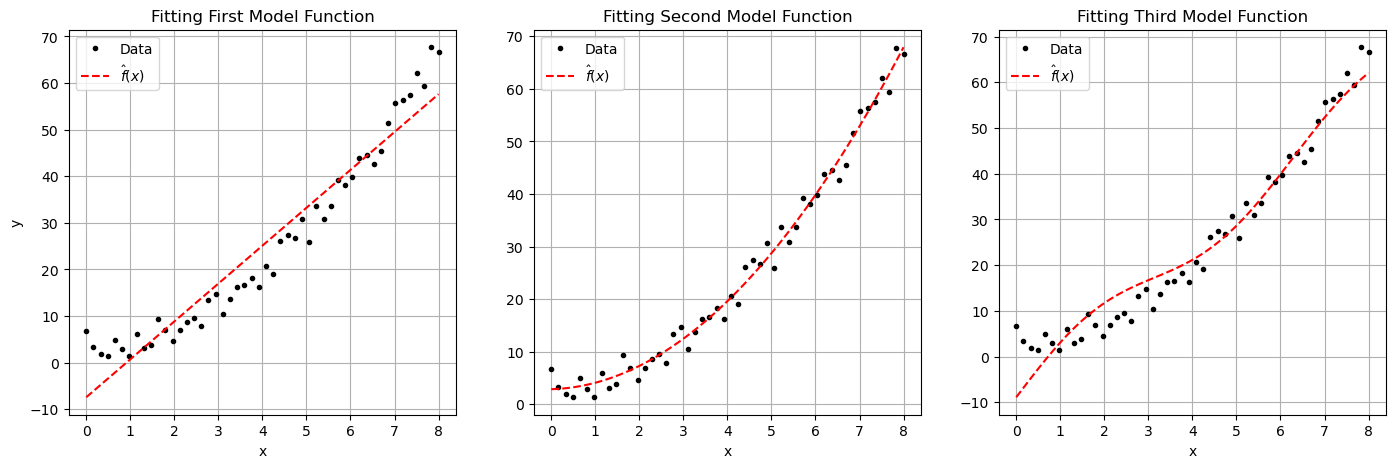

,Model Function,Expression,Sum of Squared Residuals
0,first model function,8.1315*x - 7.4359,1410.235142
1,second model function,0.986*x**2 + 0.2434*x + 2.8668,213.381739
2,third model function,8.3318*x + 4.3307*sin(x) - 8.8863,965.573110


In [5]:
fig, ax = plt.subplots(1, 3, figsize=(17,5))

# fine domain
xx = np.linspace(min(points[:,0]), max(points[:,0]), num=100)

# first model function plot
ax[0].plot(points[:,0], points[:,1], "k.", label="Data")
ax[0].plot(xx, f_hat_1(xx), "r--", label="$\hat{f}(x)$")
ax[0].set(xlabel="x", ylabel="y", title="Fitting First Model Function")
ax[0].grid(True)
ax[0].legend()

# second model function plot
ax[1].plot(points[:,0], points[:,1], "k.", label="Data")
ax[1].plot(xx, f_hat_2(xx), "r--", label="$\hat{f}(x)$")
ax[1].set(xlabel="x", title="Fitting Second Model Function")
ax[1].grid(True)
ax[1].legend()

# third model function plot
ax[2].plot(points[:,0], points[:,1], "k.", label="Data")
ax[2].plot(xx, f_hat_3(xx), "r--", label="$\hat{f}(x)$")
ax[2].set(xlabel="x", title="Fitting Third Model Function")
ax[2].grid(True)
ax[2].legend()


# summary
summary = [
    ("first model function", func_hat_1.xreplace({n : round(n, 4) for n in func_hat_1.atoms(sp.Number)}), r_1),
    ("second model function", func_hat_2.xreplace({n : round(n, 4) for n in func_hat_2.atoms(sp.Number)}), r_2),
    ("third model function", func_hat_3.xreplace({n : round(n, 4) for n in func_hat_3.atoms(sp.Number)}), r_3),
    ]

df = pd.DataFrame(data=summary, columns=["Model Function", "Expression", "Sum of Squared Residuals"])
pd.set_option('max_colwidth', 5000)

plt.show()
df

One need to note that choice of the model function that fit the trend of the data is subjective, since not all data have clear detectable trend as what we have here.

In [6]:
# generate data points
f = lambda x, y : x + y + 10 

xx = np.linspace(a, b, num=N)
yy = np.linspace(10*12, 10*b, num=N) + 1000*np.random.rand(N)

points = np.stack( (xx, yy,  f(xx, yy) + 1000*np.random.rand(N)), axis=1 )

xx, yy = np.meshgrid(xx, yy) 


In [7]:
def LS(points: list[float, float], f_hat: sp.Function = x + y + 1) -> tuple[Callable, list[Callable]]:
    '''
    Least squares method to estimate the optimal parameters of model function that fit a given 
    data points.

    Args:
        points: Set of data points in form `(x,y)`
        f_hat: Model function to estimate its parameters. Defaults to linear function `x + 1`. Note: use
        `sympy` methods to express the function.

    Returns:
        The estimated parameters, model function expression, and sum of squared residuals
    '''

    # parse model function monoms
    phis = [(lambda x, y: np.ones_like(x)*float(phi)) if sp.simplify(phi).is_constant() 
            else sp.lambdify((x,y), phi) 
            for phi in f_hat.as_ordered_terms()]

    # error equations components "i.e. Ax - c = errors"
    A = np.column_stack([phi(points[:,0],points[:,1]) for phi in phis])
    z = points[:,2]
    
    # normal equations components "i.e. A*x = b"
    A_star = np.dot(A.T,A)
    b = np.dot(A.T,z)
    
    # solve for model parameters
    beta = np.linalg.solve(A_star, b)

    # estimated model function
    func_hat = sp.Matrix(beta).dot( sp.Matrix(f_hat.as_ordered_terms()))
    f_hat = sp.lambdify(x, func_hat)

    # compute sum of squared residuals
    r = np.sum( (f_hat(points[:,0]) - z)**2 )

    return beta, func_hat, r

In [8]:
beta_1, func_hat_1, r_1 = LS(points, f_hat = x + y + 1)

f_hat_1 = sp.lambdify((x,y), func_hat_1)

In [9]:
%matplotlib widget

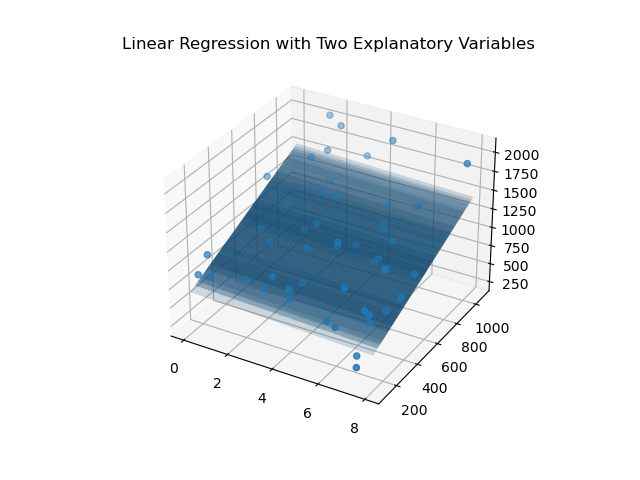

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
  
# plotting
ax.plot_surface(xx, yy, f_hat_1(xx,yy), alpha=0.1)
ax.scatter(points[:,0], points[:,1], points[:,2], 'g')

ax.set_title('Linear Regression with Two Explanatory Variables')
plt.show() 